# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
pd.options.display.float_format = '{:.2f}'.format

In [2]:
df1 = pd.read_excel("dataSet/customers_data.xls") #customer data
df2 = pd.read_excel("dataSet/receivables_data.xls") #receivable data

In [3]:
df1.head()

,Customer ID,Customer Name,Customer Payment Terms,Address,Credit Limit
0,C0200769623-0,WAL-MAR corp,NAH4,55599 Katherine Harbors Suite 551\nWest Brenda...,50000
1,C0200980828-1,BEN E,NAD1,"5488 Michael Inlet\nElizabethport, MP 17624",50000
2,C0200792734-2,MDV/ trust,NAA8,"708 Taylor Cape\nJohnstad, MT 34743",100000
3,C0140105686-3,SYSC llc,CA10,"4113 Dana Ridges\nEast Clarencestad, IA 61466",100000
4,C0140106181-4,WAL-MAR foundation,NAH4,"2759 Kimberly Villages\nThompsonside, OR 79370",100000


In [4]:
df2.head()

,Business Code,Customer Number,Customer Name,Payment_Date,Business Year,Posting_Date,Due_Date,Payterm,Invoice Currency,Total Open Amount,USD_CURRENNCY,Total Open Amount_USD,Customer Payment Terms,Invoice ID,Is Open,DUNNLEVEL,Credit_limit,Baseline_Date,Region
0,U001,200769623,WAL-MAR corp,2020-02-11 00:00:00,2020,2020-01-26,2020-02-10,15,USD,54273,USD,54273.28,NAH4,1930438491.00,0,0,50000,2020-01-23,WEST
1,U001,200980828,BEN E,2019-08-08 00:00:00,2019,2019-07-22,2019-08-11,20,USD,79657,USD,79656.60,NAD1,1929646410.00,0,2,50000,2019-07-20,MIDWEST
2,U001,200792734,MDV/ trust,2019-12-30 00:00:00,2019,2019-09-14,2019-09-29,15,USD,2254,USD,2253.86,NAA8,1929873765.00,0,3,100000,2019-09-14,NORTHEAST
3,CA02,140105686,SYSC llc,01/00/1900,2020,2020-03-30,2020-04-10,11,CAD,3300,USD,2441.78,CA10,2960623488.00,1,2,100000,2020-03-26,SOUTHWEST
4,U001,200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019,2019-11-13,2019-11-28,15,USD,33133,USD,33133.29,NAH4,1930147974.00,0,3,100000,2019-11-10,WEST


# Performing Data Transformation

In [5]:
df2.dtypes

Business Code                     object
Customer Number                   object
Customer Name                     object
Payment_Date                      object
Business Year                      int64
Posting_Date              datetime64[ns]
Due_Date                  datetime64[ns]
Payterm                            int64
Invoice Currency                  object
Total Open Amount                  int64
USD_CURRENNCY                     object
Total Open Amount_USD            float64
Customer Payment Terms            object
Invoice ID                       float64
Is Open                            int64
DUNNLEVEL                          int64
Credit_limit                       int64
Baseline_Date             datetime64[ns]
Region                            object
dtype: object

In [6]:
# Check the count of unique values in the 'Is Open' column.
df2['Is Open'].value_counts()

Is Open
0    40000
1    10000
Name: count, dtype: int64

In [7]:
df3 = df2.loc[df2['Is Open'] == 0] #using only closed items for model training, i.e. (Is Open = 0)

In [8]:
df3_copy = df3.copy()

In [9]:
df3_copy.dtypes

Business Code                     object
Customer Number                   object
Customer Name                     object
Payment_Date                      object
Business Year                      int64
Posting_Date              datetime64[ns]
Due_Date                  datetime64[ns]
Payterm                            int64
Invoice Currency                  object
Total Open Amount                  int64
USD_CURRENNCY                     object
Total Open Amount_USD            float64
Customer Payment Terms            object
Invoice ID                       float64
Is Open                            int64
DUNNLEVEL                          int64
Credit_limit                       int64
Baseline_Date             datetime64[ns]
Region                            object
dtype: object

In [10]:
# Adding id as an added column ( this is done so as to add back the dataset back to mastersheet in the end,same can be done via index also)
# Add an 'ID' column to the filtered dataset to identify items.
df3_copy.loc[:, 'ID'] = range(1, len(df3_copy) + 1)

In [11]:
# Convert the 'Payment_Date' column to datetime format with the specified date format.
df3_copy['Payment_Date'] = pd.to_datetime(df3_copy['Payment_Date'], format='%m/%d/%Y')

In [12]:
# Calculate aging by subtracting 'Payment_Date' from 'Due_Date' and store it in 'Payment_flag'.
df3_copy['Payment_flag'] = df3_copy['Due_Date'] - df3_copy['Payment_Date']

In [13]:
# Convert 'Payment_flag' into an integer variable by extracting the number of days.
df3_copy['Payment_flag'] = pd.to_numeric(df3_copy['Payment_flag'].dt.days, downcast='integer')

In [14]:
df3_copy.head()

,Business Code,Customer Number,Customer Name,Payment_Date,Business Year,Posting_Date,Due_Date,Payterm,Invoice Currency,Total Open Amount,...,Total Open Amount_USD,Customer Payment Terms,Invoice ID,Is Open,DUNNLEVEL,Credit_limit,Baseline_Date,Region,ID,Payment_flag
0,U001,200769623,WAL-MAR corp,2020-02-11,2020,2020-01-26,2020-02-10,15,USD,54273,...,54273.28,NAH4,1930438491.00,0,0,50000,2020-01-23,WEST,1,-1
1,U001,200980828,BEN E,2019-08-08,2019,2019-07-22,2019-08-11,20,USD,79657,...,79656.60,NAD1,1929646410.00,0,2,50000,2019-07-20,MIDWEST,2,3
2,U001,200792734,MDV/ trust,2019-12-30,2019,2019-09-14,2019-09-29,15,USD,2254,...,2253.86,NAA8,1929873765.00,0,3,100000,2019-09-14,NORTHEAST,3,-92
4,U001,200769623,WAL-MAR foundation,2019-11-25,2019,2019-11-13,2019-11-28,15,USD,33133,...,33133.29,NAH4,1930147974.00,0,3,100000,2019-11-10,WEST,4,3
5,CA02,140106181,THE corporation,2019-12-04,2019,2019-09-20,2019-10-04,14,CAD,22226,...,16447.12,CA10,2960581231.00,0,3,100000,2019-09-16,SOUTHEAST,5,-61


In [15]:
def map_payment_status(value):
    if value == 0:
        return 'ontime'
    elif value < 0:
        return 'late'
    else:
        return 'early'

In [16]:
df3_copy['payment_status'] = df3_copy['Payment_flag'].apply(map_payment_status)

In [17]:
df3_copy['payment_status'].value_counts()

payment_status
late      16764
early     14786
ontime     8450
Name: count, dtype: int64

In [18]:
df3_copy['Is Open'].value_counts()

Is Open
0    40000
Name: count, dtype: int64

In [19]:
# Group the data by 'Customer Number' and 'payment_flagname', and calculate the sum of 'Total Open Amount_USD'.
customer_payment_aggregates = df3_copy.groupby(
    ['Customer Number', 'payment_status']
).agg(
    {
        'Total Open Amount_USD': "sum",
    }
).reset_index()

In [20]:
# Group the data by 'Customer Number' and calculate various statistics on different columns.
customer_statistics = df3_copy.groupby(
    ['Customer Number']
).agg(
    {
        'Invoice ID': "count",
        'Credit_limit': "mean",
        'DUNNLEVEL': "mean"
    }
).reset_index()

In [21]:
customer_payment_aggregates

,Customer Number,payment_status,Total Open Amount_USD
0,100000048,late,124521.67
1,100000051,early,64713.30
2,100000051,late,37169.00
3,100000158,early,392.66
4,100000158,late,348493.18
...,...,...,...
1813,CCU001,late,763892.26
1814,CCU002,early,999344.53
1815,CCU002,late,2309222.83
1816,CCU002,ontime,156826.89


In [22]:
customer_statistics

,Customer Number,Invoice ID,Credit_limit,DUNNLEVEL
0,100000048,2,50000.00,2.50
1,100000051,3,20000.00,2.00
2,100000158,7,42857.14,1.29
3,100000217,2,20000.00,1.00
4,100000222,27,43888.89,1.63
...,...,...,...,...
1051,CC7455,4,35000.00,1.25
1052,CCCA02,444,61936.94,1.50
1053,CCU001,41,62195.12,1.29
1054,CCU002,121,60000.00,1.55


In [23]:
# Pivot the data to reshape it, using 'Customer Number' as the index and 'payment_flagname' as columns.
pivot_data = customer_payment_aggregates.pivot(index='Customer Number', columns='payment_status')

In [24]:
# Replace and fill blank values with 0.
pivot_data = pivot_data.fillna(0)

In [25]:
pivot_data.head()

Total Open Amount_USD                 
payment_status                  early      late ontime
Customer Number                                       
100000048                        0.00 124521.67   0.00
100000051                    64713.30  37169.00   0.00
100000158                      392.66 348493.18   0.00
100000217                    60523.77      0.00   0.00
100000222                   808406.91   2588.55   0.00

In [26]:
# Calculate row sums
sum_row= pivot_data.sum(axis=1)

In [27]:
# Calculate row percentages
df4 = pivot_data.div(sum_row, axis=0) * 100

In [28]:
df4.reset_index(level=['Customer Number'])

Customer Number Total Open Amount_USD              
payment_status                                 early   late ontime
0                    100000048                  0.00 100.00   0.00
1                    100000051                 63.52  36.48   0.00
2                    100000158                  0.11  99.89   0.00
3                    100000217                100.00   0.00   0.00
4                    100000222                 99.68   0.32   0.00
...                        ...                   ...    ...    ...
1051                    CC7455                  0.00 100.00   0.00
1052                    CCCA02                 23.55  71.26   5.18
1053                    CCU001                 32.14  67.86   0.00
1054                    CCU002                 28.84  66.64   4.53
1055                    CCU013                  0.00 100.00   0.00

[1056 rows x 4 columns]

In [29]:
# Reset the index with 'Customer Number' as the new index
df4 = df4.reset_index(level=['Customer Number',])

In [30]:
df4.columns

MultiIndex([(      'Customer Number',       ''),
            ('Total Open Amount_USD',  'early'),
            ('Total Open Amount_USD',   'late'),
            ('Total Open Amount_USD', 'ontime')],
           names=[None, 'payment_status'])

In [31]:
# Flatten MultiIndex and set column names
df4.columns = [f"{level[0]}_{level[1]}" if level[1] else level[0] for level in df4.columns]

# Reset index
df4.reset_index(inplace=True)

In [33]:
df4

,index,Customer Number,Total Open Amount_USD_early,Total Open Amount_USD_late,Total Open Amount_USD_ontime
0,0,100000048,0.00,100.00,0.00
1,1,100000051,63.52,36.48,0.00
2,2,100000158,0.11,99.89,0.00
3,3,100000217,100.00,0.00,0.00
4,4,100000222,99.68,0.32,0.00
...,...,...,...,...,...
1051,1051,CC7455,0.00,100.00,0.00
1052,1052,CCCA02,23.55,71.26,5.18
1053,1053,CCU001,32.14,67.86,0.00
1054,1054,CCU002,28.84,66.64,4.53


## Merging the dataframes

In [34]:
# Merge DataFrames on 'Customer Number'
df_merge = pd.merge(customer_statistics, df4, on='Customer Number')

In [35]:
df_merge

,Customer Number,Invoice ID,Credit_limit,DUNNLEVEL,index,Total Open Amount_USD_early,Total Open Amount_USD_late,Total Open Amount_USD_ontime
0,100000048,2,50000.00,2.50,0,0.00,100.00,0.00
1,100000051,3,20000.00,2.00,1,63.52,36.48,0.00
2,100000158,7,42857.14,1.29,2,0.11,99.89,0.00
3,100000217,2,20000.00,1.00,3,100.00,0.00,0.00
4,100000222,27,43888.89,1.63,4,99.68,0.32,0.00
...,...,...,...,...,...,...,...,...
1051,CC7455,4,35000.00,1.25,1051,0.00,100.00,0.00
1052,CCCA02,444,61936.94,1.50,1052,23.55,71.26,5.18
1053,CCU001,41,62195.12,1.29,1053,32.14,67.86,0.00
1054,CCU002,121,60000.00,1.55,1054,28.84,66.64,4.53


In [36]:
df_merge.drop(columns=['index'], inplace=True)

In [37]:
# Join invoice-level features with customer data using 'Customer Number' as the key and a left join
final_Data = pd.merge(df3_copy, df_merge, on='Customer Number', how='left')

In [38]:
print(final_Data)

      Business Code Customer Number       Customer Name Payment_Date  \
0              U001       200769623        WAL-MAR corp   2020-02-11   
1              U001       200980828              BEN E    2019-08-08   
2              U001       200792734          MDV/ trust   2019-12-30   
3              U001       200769623  WAL-MAR foundation   2019-11-25   
4              CA02       140106181    THE  corporation   2019-12-04   
...             ...             ...                 ...          ...   
39995          U001       200762301        C&S WH trust   2019-07-25   
39996          U001       200769623          WAL-MAR co   2019-09-03   
39997          U001       200772595    SAFEW associates   2020-03-05   
39998          U001       200726979           BJ'S  llc   2019-12-12   
39999          U001       200020431            DEC corp   2019-01-15   

       Business Year Posting_Date   Due_Date  Payterm Invoice Currency  \
0               2020   2020-01-26 2020-02-10       15        

In [39]:
# Check the data types of columns in the Masterdata DataFrame
final_Data.dtypes

Business Code                           object
Customer Number                         object
Customer Name                           object
Payment_Date                    datetime64[ns]
Business Year                            int64
Posting_Date                    datetime64[ns]
Due_Date                        datetime64[ns]
Payterm                                  int64
Invoice Currency                        object
Total Open Amount                        int64
USD_CURRENNCY                           object
Total Open Amount_USD                  float64
Customer Payment Terms                  object
Invoice ID_x                           float64
Is Open                                  int64
DUNNLEVEL_x                              int64
Credit_limit_x                           int64
Baseline_Date                   datetime64[ns]
Region                                  object
ID                                       int64
Payment_flag                             int16
payment_statu

In [40]:
# Convert the 'Payterm' column from integer to string
final_Data['Payterm'] = final_Data['Payterm'].astype(str)

In [41]:
final_Data['payment_status'].value_counts()

payment_status
late      16764
early     14786
ontime     8450
Name: count, dtype: int64

In [42]:
final_Data

,Business Code,Customer Number,Customer Name,Payment_Date,Business Year,Posting_Date,Due_Date,Payterm,Invoice Currency,Total Open Amount,...,Region,ID,Payment_flag,payment_status,Invoice ID_y,Credit_limit_y,DUNNLEVEL_y,Total Open Amount_USD_early,Total Open Amount_USD_late,Total Open Amount_USD_ontime
0,U001,200769623,WAL-MAR corp,2020-02-11,2020,2020-01-26,2020-02-10,15,USD,54273,...,WEST,1,-1,late,9581,81421.56,1.52,84.43,14.51,1.06
1,U001,200980828,BEN E,2019-08-08,2019,2019-07-22,2019-08-11,20,USD,79657,...,MIDWEST,2,3,early,54,42777.78,1.46,97.71,0.00,2.29
2,U001,200792734,MDV/ trust,2019-12-30,2019,2019-09-14,2019-09-29,15,USD,2254,...,NORTHEAST,3,-92,late,158,95569.62,1.54,34.33,30.84,34.83
3,U001,200769623,WAL-MAR foundation,2019-11-25,2019,2019-11-13,2019-11-28,15,USD,33133,...,WEST,4,3,early,9581,81421.56,1.52,84.43,14.51,1.06
4,CA02,140106181,THE corporation,2019-12-04,2019,2019-09-20,2019-10-04,14,CAD,22226,...,SOUTHEAST,5,-61,late,100,67800.00,1.53,0.16,99.84,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,U001,200762301,C&S WH trust,2019-07-25,2019,2019-07-10,2019-07-25,15,USD,84780,...,MIDWEST,39996,0,ontime,1225,100000.00,1.49,8.37,30.74,60.89
39996,U001,200769623,WAL-MAR co,2019-09-03,2019,2019-08-15,2019-08-30,15,USD,6767,...,WEST,39997,-4,late,9581,81421.56,1.52,84.43,14.51,1.06
39997,U001,200772595,SAFEW associates,2020-03-05,2020,2020-02-19,2020-03-05,15,USD,6121,...,SOUTHEAST,39998,0,ontime,248,100000.00,1.49,0.00,46.98,53.02
39998,U001,200726979,BJ'S llc,2019-12-12,2019,2019-11-27,2019-12-12,15,USD,63,...,MIDWEST,39999,0,ontime,1612,82040.94,1.50,1.93,50.84,47.23


In [43]:
# Convert the categorical 'Region' column into dummy variables
df_dummy = pd.get_dummies(final_Data['Region']).astype(int)

In [44]:
# Concatenate the original DataFrame with the dummy variables along the columns
final_Data = pd.concat([final_Data, df_dummy], axis=1)

In [45]:
final_Data

,Business Code,Customer Number,Customer Name,Payment_Date,Business Year,Posting_Date,Due_Date,Payterm,Invoice Currency,Total Open Amount,...,Credit_limit_y,DUNNLEVEL_y,Total Open Amount_USD_early,Total Open Amount_USD_late,Total Open Amount_USD_ontime,MIDWEST,NORTHEAST,SOUTHEAST,SOUTHWEST,WEST
0,U001,200769623,WAL-MAR corp,2020-02-11,2020,2020-01-26,2020-02-10,15,USD,54273,...,81421.56,1.52,84.43,14.51,1.06,0,0,0,0,1
1,U001,200980828,BEN E,2019-08-08,2019,2019-07-22,2019-08-11,20,USD,79657,...,42777.78,1.46,97.71,0.00,2.29,1,0,0,0,0
2,U001,200792734,MDV/ trust,2019-12-30,2019,2019-09-14,2019-09-29,15,USD,2254,...,95569.62,1.54,34.33,30.84,34.83,0,1,0,0,0
3,U001,200769623,WAL-MAR foundation,2019-11-25,2019,2019-11-13,2019-11-28,15,USD,33133,...,81421.56,1.52,84.43,14.51,1.06,0,0,0,0,1
4,CA02,140106181,THE corporation,2019-12-04,2019,2019-09-20,2019-10-04,14,CAD,22226,...,67800.00,1.53,0.16,99.84,0.00,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,U001,200762301,C&S WH trust,2019-07-25,2019,2019-07-10,2019-07-25,15,USD,84780,...,100000.00,1.49,8.37,30.74,60.89,1,0,0,0,0
39996,U001,200769623,WAL-MAR co,2019-09-03,2019,2019-08-15,2019-08-30,15,USD,6767,...,81421.56,1.52,84.43,14.51,1.06,0,0,0,0,1
39997,U001,200772595,SAFEW associates,2020-03-05,2020,2020-02-19,2020-03-05,15,USD,6121,...,100000.00,1.49,0.00,46.98,53.02,0,0,1,0,0
39998,U001,200726979,BJ'S llc,2019-12-12,2019,2019-11-27,2019-12-12,15,USD,63,...,82040.94,1.50,1.93,50.84,47.23,1,0,0,0,0


In [46]:
# Feature at invoice level
# Calculate the difference in days between 'Posting_Date' and 'Baseline_Date'
final_Data['diff_PB'] = final_Data['Posting_Date'] - final_Data['Baseline_Date']

In [47]:
# Convert the 'diff_PB' column to a numeric type (downcast as integer)
final_Data['diff_PB'] = pd.to_numeric(final_Data['diff_PB'].dt.days, downcast='integer')

In [48]:
final_Data.columns

Index(['Business Code', 'Customer Number', 'Customer Name', 'Payment_Date',
       'Business Year', 'Posting_Date', 'Due_Date', 'Payterm',
       'Invoice Currency', 'Total Open Amount', 'USD_CURRENNCY',
       'Total Open Amount_USD', 'Customer Payment Terms', 'Invoice ID_x',
       'Is Open', 'DUNNLEVEL_x', 'Credit_limit_x', 'Baseline_Date', 'Region',
       'ID', 'Payment_flag', 'payment_status', 'Invoice ID_y',
       'Credit_limit_y', 'DUNNLEVEL_y', 'Total Open Amount_USD_early',
       'Total Open Amount_USD_late', 'Total Open Amount_USD_ontime', 'MIDWEST',
       'NORTHEAST', 'SOUTHEAST', 'SOUTHWEST', 'WEST', 'diff_PB'],
      dtype='object')

In [49]:
# Rename specific columns in the Masterdata DataFrame
final_Data = final_Data.rename(columns={('Total Open Amount_USD_early'): 'TA_Early',
                                       ('Total Open Amount_USD_late'): 'TA_Late',
                                       ('Total Open Amount_USD_ontime'): 'TA_Ontime'})

In [50]:
# Select the specified columns as features for the model
feature_columns = final_Data.loc[:, ['ID', 'Invoice ID_x', 'Payterm', 'Total Open Amount_USD', 'Credit_limit_x', 'Payment_flag',
                                   'Credit_limit_y', 'TA_Early', 'TA_Late', 'TA_Ontime', 'MIDWEST', 'NORTHEAST', 'SOUTHEAST',
                                   'SOUTHWEST', 'WEST', 'diff_PB']]

In [51]:
feature_columns

,ID,Invoice ID_x,Payterm,Total Open Amount_USD,Credit_limit_x,Payment_flag,Credit_limit_y,TA_Early,TA_Late,TA_Ontime,MIDWEST,NORTHEAST,SOUTHEAST,SOUTHWEST,WEST,diff_PB
0,1,1930438491.00,15,54273.28,50000,-1,81421.56,84.43,14.51,1.06,0,0,0,0,1,3
1,2,1929646410.00,20,79656.60,50000,3,42777.78,97.71,0.00,2.29,1,0,0,0,0,2
2,3,1929873765.00,15,2253.86,100000,-92,95569.62,34.33,30.84,34.83,0,1,0,0,0,0
3,4,1930147974.00,15,33133.29,100000,3,81421.56,84.43,14.51,1.06,0,0,0,0,1,3
4,5,2960581231.00,14,16447.12,100000,-61,67800.00,0.16,99.84,0.00,0,0,1,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,39996,1929600989.00,15,84780.40,100000,0,100000.00,8.37,30.74,60.89,1,0,0,0,0,4
39996,39997,1929744070.00,15,6766.54,100000,-4,81421.56,84.43,14.51,1.06,0,0,0,0,1,4
39997,39998,1930536775.00,15,6120.86,100000,0,100000.00,0.00,46.98,53.02,0,0,1,0,0,3
39998,39999,1930198546.00,15,63.48,100000,0,82040.94,1.93,50.84,47.23,1,0,0,0,0,0


In [52]:
# Convert categorical column to numerical
feature_columns['Payterm'] = feature_columns['Payterm'].astype(float)  # or int, depending on the data

## Predictive Analytics and Data modelling

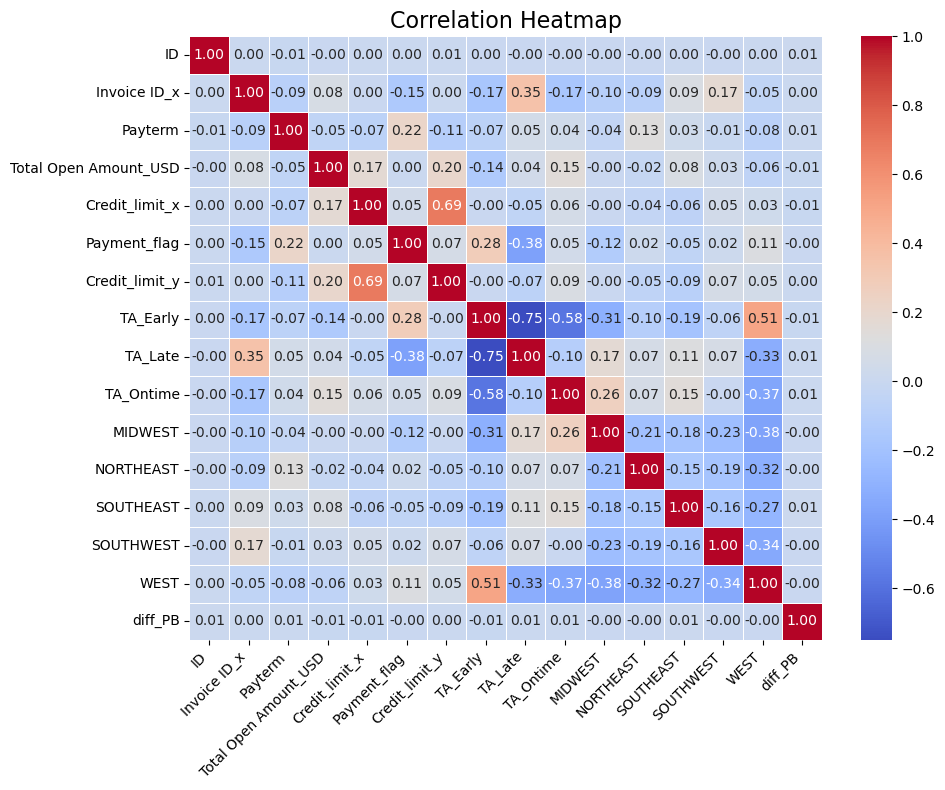

In [53]:
# Calculate the correlation matrix for the selected features
corr_matrix = feature_columns.corr()

# Set up the heatmap size and create a correlation plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Customize the plot for better visualization and aesthetics
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Display the correlation heatmap
plt.show()

In [54]:
feature_columns.isna().sum()

ID                       0
Invoice ID_x             6
Payterm                  0
Total Open Amount_USD    0
Credit_limit_x           0
Payment_flag             0
Credit_limit_y           0
TA_Early                 0
TA_Late                  0
TA_Ontime                0
MIDWEST                  0
NORTHEAST                0
SOUTHEAST                0
SOUTHWEST                0
WEST                     0
diff_PB                  0
dtype: int64

In [55]:
feature_columns_final = feature_columns.fillna(0)

### Importing ML Libraries

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [57]:
# Split the data into features (X) and target variable (y)
X = feature_columns_final.drop(['Payment_flag'], axis=1)
Y = feature_columns_final['Payment_flag']

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [58]:
# Drop unnecessary columns from the training and test feature sets
X_train_wid = X_train.drop(['Invoice ID_x', 'ID'], axis=1)
X_test_wid = X_test.drop(['Invoice ID_x', 'ID'], axis=1)

In [59]:
# Define a list of regressors
regressors = [RandomForestRegressor(), LinearRegression(), KNeighborsRegressor(), GradientBoostingRegressor(), SVR()]

best_regressor = None
best_rmse = np.inf

# Iterate over the regressors to find the best one
for regressor in regressors:
    regressor.fit(X_train_wid, Y_train)
    Y_pred = regressor.predict(X_test_wid)
    rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
    if rmse < best_rmse:
        best_rmse = rmse
        best_regressor = regressor

                   
# Use the best regressor for prediction
Y_pred = best_regressor.predict(X_test_wid)

# Evaluate the performance of the best regressor
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print("Best Regressor: ", best_regressor)
print("RMSE: ", rmse)

Best Regressor:  GradientBoostingRegressor()
RMSE:  7.55727141948988


In [60]:
# Create a gradient boosting regression model
model_gb = GradientBoostingRegressor(max_depth=6, n_estimators=50)

# Fit the model to the training data
model_gb.fit(X_train_wid, Y_train)

# Get feature importances
importances = model_gb.feature_importances_

# Predict on the training and test data
Ypred_train = model_gb.predict(X_train_wid)
Ypred_test = model_gb.predict(X_test_wid)

# Evaluate the model using R-squared and mean squared error
train_r2 = r2_score(Y_train, Ypred_train)
test_r2 = r2_score(Y_test, Ypred_test)
train_mse = mean_squared_error(Y_train, Ypred_train)
test_mse = mean_squared_error(Y_test, Ypred_test)


print("Training R-squared:", train_r2)
print("Test R-squared:", test_r2)
print("Training Mean Squared Error (MSE):", train_mse)
print("Test Mean Squared Error (MSE):", test_mse)

Training R-squared: 0.6144732694666403
Test R-squared: 0.5375061844353487
Training Mean Squared Error (MSE): 45.78184459364085
Test Mean Squared Error (MSE): 52.71899530591414


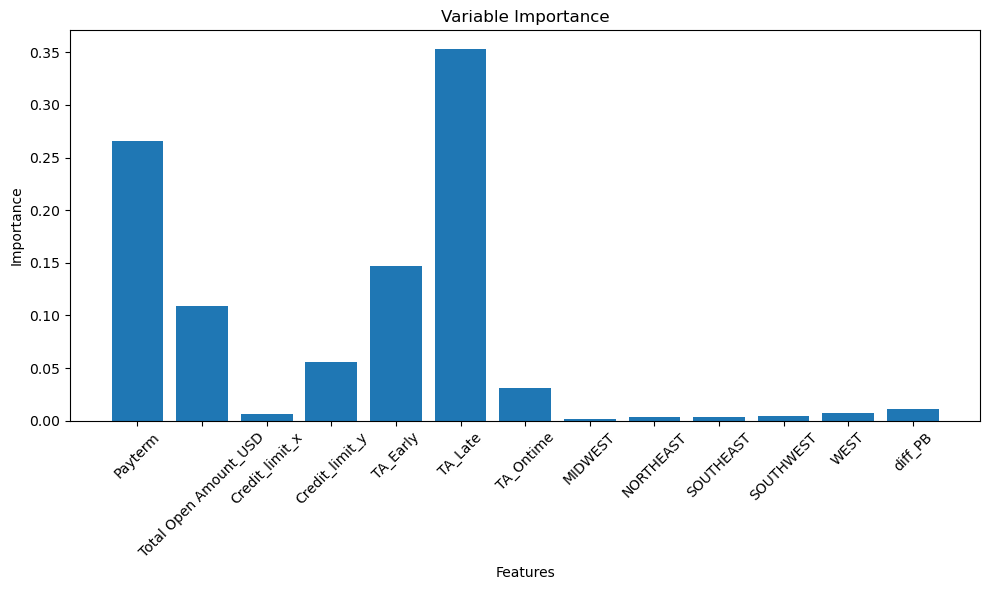

In [61]:
# Create a variable importance graph
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot feature importances
plt.bar(X_train_wid.columns, importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Variable Importance')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust the spacing of the plot elements
plt.show()

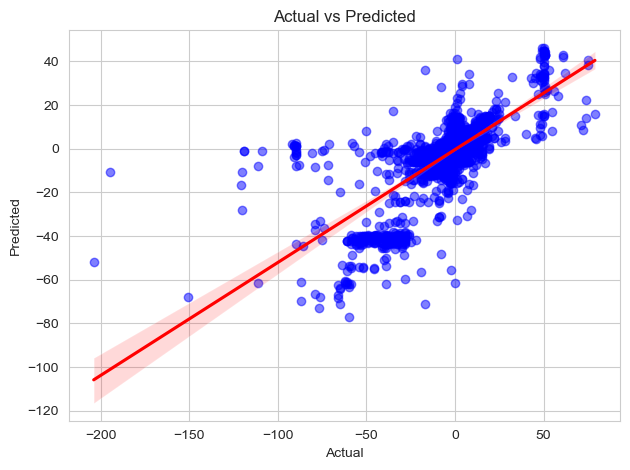

In [62]:
sns.set_style("whitegrid")
sns.regplot(x=Y_test, y=Ypred_test, scatter_kws={'color': 'blue', 'alpha': 0.5}, line_kws={'color': 'red'})
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.tight_layout()
plt.show()

In [63]:
# Convert NumPy arrays to DataFrames for train and test predictions
train_predictions_df = pd.DataFrame(Ypred_train)
test_predictions_df = pd.DataFrame(Ypred_test)

In [64]:
# Reset the index of the DataFrame for training features
X_train_reset = X_train.reset_index()

# Display the DataFrame with the reset index
print(X_train_reset)

       index     ID  Invoice ID_x  Payterm  Total Open Amount_USD  \
0      38015  38016 2960588404.00    12.00               65768.12   
1       2281   2282 2960520931.00    11.00               35203.64   
2      36629  36630 1928650917.00    15.00               13125.10   
3       6087   6088 2960612114.00    36.00               17741.32   
4      11792  11793 1930573728.00    15.00                2121.87   
...      ...    ...           ...      ...                    ...   
27995   6265   6266 1930019458.00    15.00                1388.94   
27996  11284  11285 1928702643.00    15.00               35601.36   
27997  38158  38159 1929445251.00    15.00               13214.98   
27998    860    861 1928589831.00    15.00               22466.36   
27999  15795  15796 1928725413.00    15.00               11380.79   

       Credit_limit_x  Credit_limit_y  TA_Early  TA_Late  TA_Ontime  MIDWEST  \
0               50000        88142.86      0.00    99.82       0.18        0   
1          

In [65]:
train_merge = pd.concat([X_train_reset, train_predictions_df], axis=1)

In [66]:
# Reset the index of the DataFrame for testing features
X_test_reset = X_test.reset_index()

# Display the DataFrame with reset index
print(X_test_reset)

       index     ID  Invoice ID_x  Payterm  Total Open Amount_USD  \
0      32823  32824 1929994452.00    15.00               24177.02   
1      16298  16299 1929646090.00    17.00                5208.70   
2      28505  28506 1929917929.00    15.00               30591.50   
3       6689   6690 1929830878.00    15.00               20612.45   
4      26893  26894 1930548952.00    15.00                9216.24   
...      ...    ...           ...      ...                    ...   
11995   3779   3780 1930548709.00    15.00                 481.75   
11996  11973  11974 1929209537.00    15.00                 223.49   
11997  35668  35669 2960601601.00    17.00              133705.13   
11998    483    484 1930211877.00    21.00               14743.96   
11999   1380   1381 2960585220.00    11.00                1154.44   

       Credit_limit_x  Credit_limit_y  TA_Early  TA_Late  TA_Ontime  MIDWEST  \
0               50000        79130.43      1.63    63.40      34.97        0   
1          

In [67]:
# Merge test data features and predictions by concatenating along axis=1
test_merge = pd.concat([X_test_reset, test_predictions_df], axis=1)

In [68]:
merge_final = pd.concat([train_merge, test_merge], axis=0)

In [69]:
# Rename the column to 'Predicted_value' in merged_df_all
merge_final = merge_final.rename(columns={0: 'Predicted_value'})

In [70]:
# Join the 'Predicted_value' column from merged_df_all to Masterdata using 'ID' as the common identifier
df_with_predicted = pd.merge(final_Data, merge_final[['ID', 'Predicted_value']], on='ID')

# Display the merged DataFrame
print(df_with_predicted)

      Business Code Customer Number       Customer Name Payment_Date  \
0              U001       200769623        WAL-MAR corp   2020-02-11   
1              U001       200980828              BEN E    2019-08-08   
2              U001       200792734          MDV/ trust   2019-12-30   
3              U001       200769623  WAL-MAR foundation   2019-11-25   
4              CA02       140106181    THE  corporation   2019-12-04   
...             ...             ...                 ...          ...   
39995          U001       200762301        C&S WH trust   2019-07-25   
39996          U001       200769623          WAL-MAR co   2019-09-03   
39997          U001       200772595    SAFEW associates   2020-03-05   
39998          U001       200726979           BJ'S  llc   2019-12-12   
39999          U001       200020431            DEC corp   2019-01-15   

       Business Year Posting_Date   Due_Date Payterm Invoice Currency  \
0               2020   2020-01-26 2020-02-10      15          

### Transforming Predicted Dataset

In [71]:
from datetime import timedelta

In [72]:
# Convert the float column 'Predicted_value' to timedelta in days
df_with_predicted['Predict_Timedelta'] = pd.to_timedelta(df_with_predicted['Predicted_value'], unit='days')

In [73]:
# merge
df_with_predicted['Predict_Timedelta']

0          2 days 18:09:37.577111397
1          5 days 08:36:20.522532182
2        -2 days +12:56:58.792683360
3          2 days 17:42:31.178240979
4       -56 days +04:43:08.424971259
                    ...             
39995    -1 days +08:17:13.962799778
39996      2 days 03:33:52.698278016
39997    -2 days +10:47:41.092391694
39998    -2 days +17:24:51.828372945
39999      6 days 13:43:51.463196253
Name: Predict_Timedelta, Length: 40000, dtype: timedelta64[ns]

In [74]:
# Calculate 'Predicted_Date' by adding 'Predict_Timedelta' to 'Due_Date'
df_with_predicted['Predicted_Date'] = df_with_predicted['Due_Date'] + df_with_predicted['Predict_Timedelta']

In [75]:
# Convert the datetime column to date
df_with_predicted['Predicted_Date'] = pd.to_datetime(df_with_predicted['Predicted_Date']).dt.date

In [76]:
# Convert the 'Date' column from object to date
df_with_predicted['Predicted_Date'] = pd.to_datetime(df_with_predicted['Predicted_Date'])

In [77]:
# Get the week number from 'Predicted_Date' and 'Payment_Date'
df_with_predicted['Predicted_Week'] = df_with_predicted['Predicted_Date'].dt.isocalendar().week
df_with_predicted['ActualPaid_week'] = df_with_predicted['Payment_Date'].dt.isocalendar().week

# Display the DataFrame with the week numbers
print(df_with_predicted)

      Business Code Customer Number       Customer Name Payment_Date  \
0              U001       200769623        WAL-MAR corp   2020-02-11   
1              U001       200980828              BEN E    2019-08-08   
2              U001       200792734          MDV/ trust   2019-12-30   
3              U001       200769623  WAL-MAR foundation   2019-11-25   
4              CA02       140106181    THE  corporation   2019-12-04   
...             ...             ...                 ...          ...   
39995          U001       200762301        C&S WH trust   2019-07-25   
39996          U001       200769623          WAL-MAR co   2019-09-03   
39997          U001       200772595    SAFEW associates   2020-03-05   
39998          U001       200726979           BJ'S  llc   2019-12-12   
39999          U001       200020431            DEC corp   2019-01-15   

       Business Year Posting_Date   Due_Date Payterm Invoice Currency  \
0               2020   2020-01-26 2020-02-10      15          

In [78]:
correct_predictions = (df_with_predicted['ActualPaid_week'] == df_with_predicted['Predicted_Week']).sum()
print(correct_predictions)

16334


# Accounts Payable Code

In [80]:
df5 = pd.read_excel("dataSet/suppliers_data.xls") #supplier data
df6 = pd.read_excel("dataSet/payables_data.xls") #payable data

In [81]:
data_payables = df6.copy()

In [82]:
data_payables

,Invoice Number,Posting Date,Invoice Date,Payment Date,Net Due Date (System Calculated Date),Supplier ID,Invoice Amount,Fiscal year,Overdue,Invoice Status,Spend Category,Total Outstanding amount,Late payment fees,Payterm_n,Vendor_Type
0,INV-5978675602067198,2019-04-12 00:00:00,2019-04-12 00:00:00,30-12-2019,2020-04-01 00:00:00,S-198,7147,2019-2020,0,Paid,Taxes,0,0,30,Domestic
1,INV-4385639898658799,16-03-2020,2020-12-03 00:00:00,NaN,16-04-2020,S-187,8575,2020-2021,75,Unpaid,Raw Material,8575,600,30,Domestic
2,INV-4586812911382721,26-12-2019,24-12-2019,2020-01-01 00:00:00,26-02-2020,S-300,6790,2019-2020,0,Paid,Raw Material,0,0,60,Domestic
3,INV-8091675473911407,14-01-2020,2020-10-01 00:00:00,NaN,14-02-2020,S-497,6575,2020-2021,137,Unpaid,Services,6575,822,30,Domestic
4,INV-9623721287362728,2019-08-12 00:00:00,2019-04-12 00:00:00,20-01-2020,2020-08-03 00:00:00,S-310,12635,2019-2020,0,Paid,Raw Material,0,0,90,Domestic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,INV-1713719091552310,2019-05-12 00:00:00,2019-05-12 00:00:00,NaN,2020-05-02 00:00:00,S-206,14372,2019-2020,146,Unpaid,Raw Material,14372,876,60,Domestic
19996,INV-923263686839893,2019-03-06 00:00:00,2019-03-06 00:00:00,20-08-2019,2019-03-09 00:00:00,S-449,13346,2019-2020,0,Paid,Raw Material,0,0,90,Domestic
19997,INV-5455341338205475,2020-09-02 00:00:00,2020-04-02 00:00:00,NaN,2020-09-03 00:00:00,S-232,7437,2020-2021,113,Unpaid,Services,7437,904,30,Domestic
19998,INV-5306060259604092,2019-01-05 00:00:00,2019-01-05 00:00:00,27-06-2019,2019-01-08 00:00:00,S-158,13400,2019-2020,0,Paid,Raw Material,0,0,90,Domestic


In [83]:
data_payables.dtypes

Invoice Number                           object
Posting Date                             object
Invoice Date                             object
Payment Date                             object
Net Due Date (System Calculated Date)    object
Supplier ID                              object
Invoice Amount                            int64
Fiscal year                              object
Overdue                                   int64
Invoice Status                           object
Spend Category                           object
Total Outstanding amount                  int64
Late payment fees                         int64
Payterm_n                                 int64
Vendor_Type                              object
dtype: object

### Data Transformation

In [84]:
data_payables['Invoice Status'].value_counts()

Invoice Status
Paid      13988
Unpaid     6012
Name: count, dtype: int64

In [85]:
df_filtered = data_payables[data_payables['Invoice Status'] != 'Unpaid']

In [86]:
df7 = df_filtered.copy()

In [87]:
# Convert date columns to datetime
df7['Posting_Date'] = pd.to_datetime(df7['Posting Date'], dayfirst=True)
df7['Due_Date'] = pd.to_datetime(df7['Net Due Date (System Calculated Date)'], dayfirst=True)
df7['Invoice Date'] = pd.to_datetime(df7['Invoice Date'], dayfirst=True)
df7['Payment Date'] = pd.to_datetime(df7['Payment Date'], dayfirst=True)

In [88]:
# Convert and round numeric columns to specified data types
df7['Invoice Amount'] = df7['Invoice Amount'].astype(float).round(1)
df7['Overdue'] = df7['Overdue'].astype(float).round(1)
df7['Total Outstanding amount'] = df7['Total Outstanding amount'].astype(float).round(1)
df7['Late payment fees'] = df7['Late payment fees'].astype(float).round(1)
df7['Payterm_n'] = df7['Payterm_n'].astype(int)

In [89]:
df_payables = df7.copy()

In [90]:
df_payables.dtypes

Invoice Number                                   object
Posting Date                                     object
Invoice Date                             datetime64[ns]
Payment Date                             datetime64[ns]
Net Due Date (System Calculated Date)            object
Supplier ID                                      object
Invoice Amount                                  float64
Fiscal year                                      object
Overdue                                         float64
Invoice Status                                   object
Spend Category                                   object
Total Outstanding amount                        float64
Late payment fees                               float64
Payterm_n                                         int32
Vendor_Type                                      object
Posting_Date                             datetime64[ns]
Due_Date                                 datetime64[ns]
dtype: object

In [91]:
# Creating ID column
df_payables['ID'] = range(1, len(df_payables) + 1)

In [92]:
# Calculate the age of payments by subtracting 'Payment Date' from 'Due Date'
df_payables['Payment_flag'] = df_payables['Due_Date'] - df_payables['Payment Date']

In [93]:
df_payables

,Invoice Number,Posting Date,Invoice Date,Payment Date,Net Due Date (System Calculated Date),Supplier ID,Invoice Amount,Fiscal year,Overdue,Invoice Status,Spend Category,Total Outstanding amount,Late payment fees,Payterm_n,Vendor_Type,Posting_Date,Due_Date,ID,Payment_flag
0,INV-5978675602067198,2019-04-12 00:00:00,2019-04-12,2019-12-30,2020-04-01 00:00:00,S-198,7147.00,2019-2020,0.00,Paid,Taxes,0.00,0.00,30,Domestic,2019-04-12,2020-04-01,1,93 days
2,INV-4586812911382721,26-12-2019,2019-12-24,2020-01-01,26-02-2020,S-300,6790.00,2019-2020,0.00,Paid,Raw Material,0.00,0.00,60,Domestic,2019-12-26,2020-02-26,2,56 days
4,INV-9623721287362728,2019-08-12 00:00:00,2019-04-12,2020-01-20,2020-08-03 00:00:00,S-310,12635.00,2019-2020,0.00,Paid,Raw Material,0.00,0.00,90,Domestic,2019-08-12,2020-08-03,3,196 days
5,INV-6391763768436907,2019-11-03 00:00:00,2019-11-03,2019-03-24,2019-11-04 00:00:00,S-191,6808.00,2019-2020,0.00,Paid,Services,0.00,0.00,30,Domestic,2019-11-03,2019-11-04,4,225 days
7,INV-576255376736098,18-07-2019,2019-07-15,2019-10-24,18-08-2019,S-222,5834.00,2019-2020,67.00,Paid,Raw Material,0.00,402.00,30,Domestic,2019-07-18,2019-08-18,5,-67 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19993,INV-2094234150697486,2019-05-02 00:00:00,2019-04-02,2019-03-14,2019-05-03 00:00:00,S-434,11870.00,2019-2020,9.00,Paid,Raw Material,0.00,63.00,30,Domestic,2019-05-02,2019-05-03,13984,50 days
19994,INV-9971508041177690,2019-03-04 00:00:00,2019-03-29,2019-03-05,2019-03-07 00:00:00,S-154,5444.00,2019-2020,0.00,Paid,Raw Material,0.00,0.00,90,Domestic,2019-03-04,2019-03-07,13985,2 days
19996,INV-923263686839893,2019-03-06 00:00:00,2019-03-06,2019-08-20,2019-03-09 00:00:00,S-449,13346.00,2019-2020,0.00,Paid,Raw Material,0.00,0.00,90,Domestic,2019-03-06,2019-03-09,13986,-164 days
19998,INV-5306060259604092,2019-01-05 00:00:00,2019-01-05,2019-06-27,2019-01-08 00:00:00,S-158,13400.00,2019-2020,0.00,Paid,Raw Material,0.00,0.00,90,Domestic,2019-01-05,2019-01-08,13987,-170 days


In [94]:
# Convert the 'Payment_flag' to an integer by extracting the number of days
df_payables['Payment_flag'] = pd.to_numeric(df_payables['Payment_flag'].dt.days, downcast='integer')

In [95]:
def map_payment_status(value):
    if value == 0:
        return 'ontime'
    elif value < 0:
        return 'late'
    else:
        return 'early'

In [96]:
df_payables['payment_status'] = df_payables['Payment_flag'].apply(map_payment_status)

In [97]:
df_payables['payment_status'].value_counts()

payment_status
early     7795
late      6074
ontime     119
Name: count, dtype: int64

In [98]:
vendor_stats = df_payables.groupby(
    ['Supplier ID', 'payment_status']
).agg(
    {
        # Aggregate statistics: sum of 'Invoice Amount', mean of 'Late payment fees',
        # count of 'Invoice Number', and mean of 'Overdue'
        'Invoice Amount': "sum",
        'Late payment fees': 'mean',
        'Invoice Number': "count",
        'Overdue': "mean"
    }
).reset_index()

In [99]:
# Group the DataFrame by 'Supplier ID' to create additional customer-level features
vendor_stats_others = df_payables.groupby(
    ['Supplier ID']
).agg(
    {
        # Aggregate statistics: mean of 'Late payment fees', count of 'Invoice Number', and mean of 'Overdue'
        'Late payment fees': 'mean',
        'Invoice Number': "count",
        'Overdue': "mean"
    }
).reset_index()

In [100]:
# reshaped_data = vendor_pivot.pivot(index='Supplier ID', columns='payment_flagname')
# Pivot the DataFrame 'vendor_pivot' to create a new DataFrame 'reshaped_dataAP'
reshaped_dataAP = vendor_stats.pivot(index=['Supplier ID'], columns='payment_status', values='Invoice Amount')

In [101]:
print(reshaped_dataAP)

payment_status     early      late   ontime
Supplier ID                                
S-1             20114.00  33361.00 29647.00
S-10           195686.00 177684.00 18049.00
S-100           64792.00  49186.00      NaN
S-101          102777.00  81315.00 18720.00
S-102          186727.00 105914.00      NaN
...                  ...       ...      ...
S-95           143218.00 122706.00      NaN
S-96           199677.00  94972.00 13836.00
S-97            56813.00 110131.00      NaN
S-98           154104.00 134706.00      NaN
S-99           230768.00  66565.00      NaN

[500 rows x 3 columns]


In [102]:
# Fill missing values (NaN) with 0 in the 'reshaped_dataAP' DataFrame
df_pivot_ap = reshaped_dataAP.fillna(0)

In [103]:
print(df_pivot_ap)

payment_status     early      late   ontime
Supplier ID                                
S-1             20114.00  33361.00 29647.00
S-10           195686.00 177684.00 18049.00
S-100           64792.00  49186.00     0.00
S-101          102777.00  81315.00 18720.00
S-102          186727.00 105914.00     0.00
...                  ...       ...      ...
S-95           143218.00 122706.00     0.00
S-96           199677.00  94972.00 13836.00
S-97            56813.00 110131.00     0.00
S-98           154104.00 134706.00     0.00
S-99           230768.00  66565.00     0.00

[500 rows x 3 columns]


In [104]:
# Calculate row sums
row_sums_ap = df_pivot_ap.sum(axis=1)
# Calculate percentage split at the vendor level, similar to what was done for AR
df_percent_ap = df_pivot_ap.div(row_sums_ap, axis=0) * 100

In [105]:
# Extract specific columns from 'vendor_pivot_others' DataFrame
df_ap_stats_others = vendor_stats_others.loc[:, ['Supplier ID', 'Invoice Number', 'Late payment fees', 'Overdue']]

# Print the extracted DataFrame
print(df_ap_stats_others)

    Supplier ID  Invoice Number  Late payment fees  Overdue
0           S-1              36             187.11    25.61
1          S-10              32              49.59     8.75
2         S-100              23             145.48    22.91
3         S-101              18             131.89    21.83
4         S-102              24              38.50     6.67
..          ...             ...                ...      ...
495        S-95              23             121.61    22.13
496        S-96              25              57.08     8.56
497        S-97              28             119.04    15.36
498        S-98              26             119.62    18.62
499        S-99              24              33.75     6.58

[500 rows x 4 columns]


In [106]:
# Merge 'df_percent_ap' and 'df_ap_others' DataFrames based on 'Supplier ID'
df_merge_ap = pd.merge(df_percent_ap, df_ap_stats_others, on='Supplier ID')

In [107]:
df_merge_ap

,Supplier ID,early,late,ontime,Invoice Number,Late payment fees,Overdue
0,S-1,24.20,40.13,35.67,36,187.11,25.61
1,S-10,49.99,45.39,4.61,32,49.59,8.75
2,S-100,56.85,43.15,0.00,23,145.48,22.91
3,S-101,50.68,40.09,9.23,18,131.89,21.83
4,S-102,63.81,36.19,0.00,24,38.50,6.67
...,...,...,...,...,...,...,...
495,S-95,53.86,46.14,0.00,23,121.61,22.13
496,S-96,64.73,30.79,4.49,25,57.08,8.56
497,S-97,34.03,65.97,0.00,28,119.04,15.36
498,S-98,53.36,46.64,0.00,26,119.62,18.62


In [108]:
df_payables

,Invoice Number,Posting Date,Invoice Date,Payment Date,Net Due Date (System Calculated Date),Supplier ID,Invoice Amount,Fiscal year,Overdue,Invoice Status,Spend Category,Total Outstanding amount,Late payment fees,Payterm_n,Vendor_Type,Posting_Date,Due_Date,ID,Payment_flag,payment_status
0,INV-5978675602067198,2019-04-12 00:00:00,2019-04-12,2019-12-30,2020-04-01 00:00:00,S-198,7147.00,2019-2020,0.00,Paid,Taxes,0.00,0.00,30,Domestic,2019-04-12,2020-04-01,1,93,early
2,INV-4586812911382721,26-12-2019,2019-12-24,2020-01-01,26-02-2020,S-300,6790.00,2019-2020,0.00,Paid,Raw Material,0.00,0.00,60,Domestic,2019-12-26,2020-02-26,2,56,early
4,INV-9623721287362728,2019-08-12 00:00:00,2019-04-12,2020-01-20,2020-08-03 00:00:00,S-310,12635.00,2019-2020,0.00,Paid,Raw Material,0.00,0.00,90,Domestic,2019-08-12,2020-08-03,3,196,early
5,INV-6391763768436907,2019-11-03 00:00:00,2019-11-03,2019-03-24,2019-11-04 00:00:00,S-191,6808.00,2019-2020,0.00,Paid,Services,0.00,0.00,30,Domestic,2019-11-03,2019-11-04,4,225,early
7,INV-576255376736098,18-07-2019,2019-07-15,2019-10-24,18-08-2019,S-222,5834.00,2019-2020,67.00,Paid,Raw Material,0.00,402.00,30,Domestic,2019-07-18,2019-08-18,5,-67,late
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19993,INV-2094234150697486,2019-05-02 00:00:00,2019-04-02,2019-03-14,2019-05-03 00:00:00,S-434,11870.00,2019-2020,9.00,Paid,Raw Material,0.00,63.00,30,Domestic,2019-05-02,2019-05-03,13984,50,early
19994,INV-9971508041177690,2019-03-04 00:00:00,2019-03-29,2019-03-05,2019-03-07 00:00:00,S-154,5444.00,2019-2020,0.00,Paid,Raw Material,0.00,0.00,90,Domestic,2019-03-04,2019-03-07,13985,2,early
19996,INV-923263686839893,2019-03-06 00:00:00,2019-03-06,2019-08-20,2019-03-09 00:00:00,S-449,13346.00,2019-2020,0.00,Paid,Raw Material,0.00,0.00,90,Domestic,2019-03-06,2019-03-09,13986,-164,late
19998,INV-5306060259604092,2019-01-05 00:00:00,2019-01-05,2019-06-27,2019-01-08 00:00:00,S-158,13400.00,2019-2020,0.00,Paid,Raw Material,0.00,0.00,90,Domestic,2019-01-05,2019-01-08,13987,-170,late


In [109]:
# Join invoice-level features with customer data using 'Supplier ID' as the key, and use a left join
data_master_ap = pd.merge(df_payables, df_merge_ap, on='Supplier ID', how='left')

# Print the master DataFrame
print(data_master_ap)

           Invoice Number_x         Posting Date Invoice Date Payment Date  \
0      INV-5978675602067198  2019-04-12 00:00:00   2019-04-12   2019-12-30   
1      INV-4586812911382721           26-12-2019   2019-12-24   2020-01-01   
2      INV-9623721287362728  2019-08-12 00:00:00   2019-04-12   2020-01-20   
3      INV-6391763768436907  2019-11-03 00:00:00   2019-11-03   2019-03-24   
4       INV-576255376736098           18-07-2019   2019-07-15   2019-10-24   
...                     ...                  ...          ...          ...   
13983  INV-2094234150697486  2019-05-02 00:00:00   2019-04-02   2019-03-14   
13984  INV-9971508041177690  2019-03-04 00:00:00   2019-03-29   2019-03-05   
13985   INV-923263686839893  2019-03-06 00:00:00   2019-03-06   2019-08-20   
13986  INV-5306060259604092  2019-01-05 00:00:00   2019-01-05   2019-06-27   
13987  INV-3588784185880170  2019-01-03 00:00:00   2019-02-25   2019-04-13   

      Net Due Date (System Calculated Date) Supplier ID  Invoic

In [110]:
# Convert categorical columns 'Spend Category' and 'Vendor_Type' into dummy variables
dummy_df_ap = pd.get_dummies(data_master_ap[['Spend Category', 'Vendor_Type']]).astype(int)

In [111]:
# Concatenate the original DataFrame with the dummy variables along the columns (axis=1)
data_master_ap = pd.concat([data_master_ap, dummy_df_ap], axis=1)

# Print the updated DataFrame
print(data_master_ap)

           Invoice Number_x         Posting Date Invoice Date Payment Date  \
0      INV-5978675602067198  2019-04-12 00:00:00   2019-04-12   2019-12-30   
1      INV-4586812911382721           26-12-2019   2019-12-24   2020-01-01   
2      INV-9623721287362728  2019-08-12 00:00:00   2019-04-12   2020-01-20   
3      INV-6391763768436907  2019-11-03 00:00:00   2019-11-03   2019-03-24   
4       INV-576255376736098           18-07-2019   2019-07-15   2019-10-24   
...                     ...                  ...          ...          ...   
13983  INV-2094234150697486  2019-05-02 00:00:00   2019-04-02   2019-03-14   
13984  INV-9971508041177690  2019-03-04 00:00:00   2019-03-29   2019-03-05   
13985   INV-923263686839893  2019-03-06 00:00:00   2019-03-06   2019-08-20   
13986  INV-5306060259604092  2019-01-05 00:00:00   2019-01-05   2019-06-27   
13987  INV-3588784185880170  2019-01-03 00:00:00   2019-02-25   2019-04-13   

      Net Due Date (System Calculated Date) Supplier ID  Invoic

In [112]:
# Calculate the difference between 'Posting_Date' and 'Invoice Date'
data_master_ap['diff_PB'] = data_master_ap['Posting_Date'] - data_master_ap['Invoice Date']

In [113]:
# Convert the 'diff_PB' column to an integer by extracting the number of days
data_master_ap['diff_PB'] = pd.to_numeric(data_master_ap['diff_PB'].dt.days, downcast='integer')

In [114]:
# Select specific columns for modeling from the 'Masterdata_ap' DataFrame
feature_columns_ap = data_master_ap.loc[:, ['ID', 'Invoice Number_x', 'diff_PB', 'Spend Category_Fees',
                                         'Spend Category_Raw Material', 'Spend Category_Services', 'Spend Category_Taxes',
                                         'Spend Category_Utility', 'Overdue_y', 'Payterm_n', 'Vendor_Type_Domestic',
                                         'Vendor_Type_International', 'Late payment fees_y', 'Invoice Number_y', 'early',
                                         'late', 'ontime', 'Payment_flag', 'Invoice Amount']]

In [115]:
feature_columns_ap.dtypes

ID                               int64
Invoice Number_x                object
diff_PB                          int16
Spend Category_Fees              int32
Spend Category_Raw Material      int32
Spend Category_Services          int32
Spend Category_Taxes             int32
Spend Category_Utility           int32
Overdue_y                      float64
Payterm_n                        int32
Vendor_Type_Domestic             int32
Vendor_Type_International        int32
Late payment fees_y            float64
Invoice Number_y                 int64
early                          float64
late                           float64
ontime                         float64
Payment_flag                     int16
Invoice Amount                 float64
dtype: object

In [116]:
import re
feature_columns_ap['Invoice Number_x'] = feature_columns_ap['Invoice Number_x'].apply(lambda x: float(re.search(r'\d+', x).group()))

In [117]:
feature_columns_ap.dtypes

ID                               int64
Invoice Number_x               float64
diff_PB                          int16
Spend Category_Fees              int32
Spend Category_Raw Material      int32
Spend Category_Services          int32
Spend Category_Taxes             int32
Spend Category_Utility           int32
Overdue_y                      float64
Payterm_n                        int32
Vendor_Type_Domestic             int32
Vendor_Type_International        int32
Late payment fees_y            float64
Invoice Number_y                 int64
early                          float64
late                           float64
ontime                         float64
Payment_flag                     int16
Invoice Amount                 float64
dtype: object

In [118]:
feature_columns_ap.describe()

,ID,Invoice Number_x,diff_PB,Spend Category_Fees,Spend Category_Raw Material,Spend Category_Services,Spend Category_Taxes,Spend Category_Utility,Overdue_y,Payterm_n,Vendor_Type_Domestic,Vendor_Type_International,Late payment fees_y,Invoice Number_y,early,late,ontime,Payment_flag,Invoice Amount
count,13988.00,13988.00,13988.00,13988.00,13988.00,13988.00,13988.00,13988.00,13988.00,13988.00,13988.00,13988.00,13988.00,13988.00,13988.00,13988.00,13988.00,13988.00,13988.00
mean,6994.50,4976052486097380.00,2.86,0.01,0.85,0.08,0.01,0.06,12.15,60.90,0.98,0.02,72.98,29.08,55.53,43.65,0.82,8.12,11292.04
std,4038.13,2901443088890624.00,81.08,0.08,0.35,0.27,0.07,0.23,5.10,24.69,0.15,0.15,32.93,5.56,11.17,10.54,3.12,125.92,5082.83
min,1.00,472378542747.00,-322.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,6.88,13.00,17.32,14.65,0.00,-630.00,101.00
25%,3497.75,2442515719726612.00,0.00,0.00,1.00,0.00,0.00,0.00,8.59,30.00,1.00,0.00,49.09,25.00,48.49,36.27,0.00,-54.00,7297.75
50%,6994.50,4992964930276576.00,3.00,0.00,1.00,0.00,0.00,0.00,11.32,60.00,1.00,0.00,66.93,29.00,56.40,43.38,0.00,8.00,11254.50
75%,10491.25,7495386610801415.00,30.00,0.00,1.00,0.00,0.00,0.00,15.33,90.00,1.00,0.00,94.07,33.00,62.93,50.24,0.00,65.00,15632.00
max,13988.00,9999348211438420.00,153.00,1.00,1.00,1.00,1.00,1.00,28.12,90.00,1.00,1.00,188.22,45.00,85.35,76.88,35.67,659.00,19999.00


## Data Modelling and Predictive Analytics

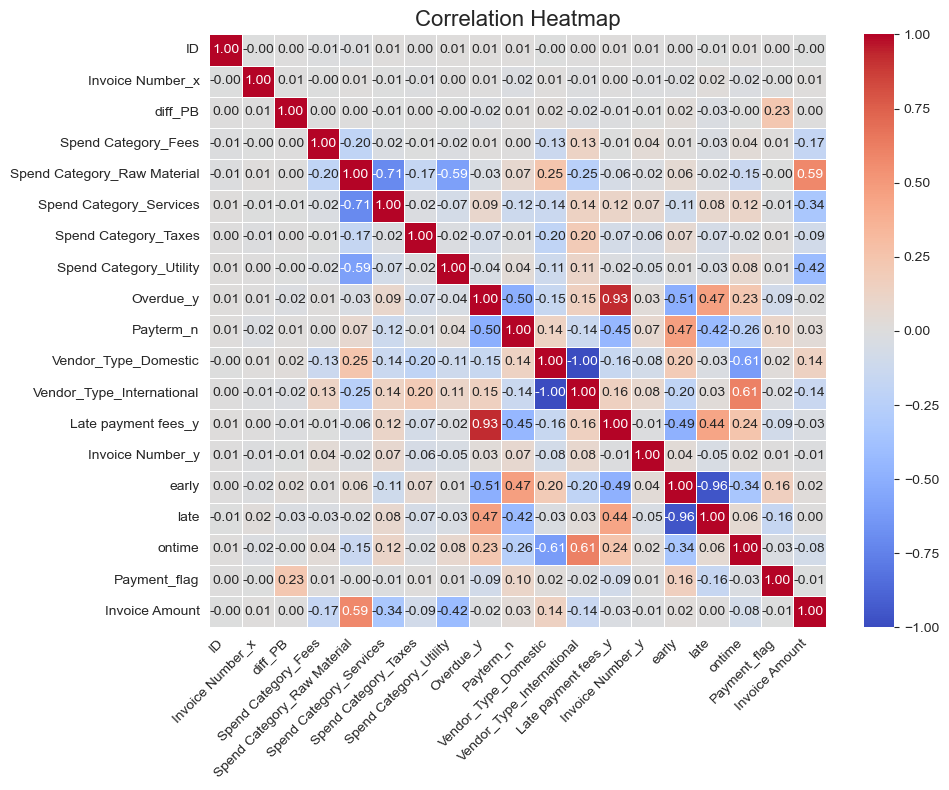

In [119]:
# Calculate the correlation matrix for the selected columns
corr_matrix_ap = feature_columns_ap.corr()

# Set up the size of the heatmap for better visualization
plt.figure(figsize=(10, 8))

# Create a correlation plot using seaborn with annotations, a color map, and formatting
sns.heatmap(corr_matrix_ap, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add a title and adjust the layout for better aesthetics
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

In [120]:
# Find columns with a correlation greater than 0.8 and drop them to reduce multicollinearity
high_corr_columns = set()
for i in range(len(corr_matrix_ap.columns)):
    for j in range(i):
        if abs(corr_matrix_ap.iloc[i, j]) > 0.8:
            colname = corr_matrix_ap.columns[i]
            high_corr_columns.add(colname)

# Drop the high-correlation columns from the 'Model_columns_ap' DataFrame
feature_columns_ap_new = feature_columns_ap.drop(high_corr_columns, axis=1)

# Print the DataFrame with reduced multicollinearity
print(feature_columns_ap_new)

          ID    Invoice Number_x  diff_PB  Spend Category_Fees  \
0          1 5978675602067198.00        0                    0   
1          2 4586812911382721.00        2                    0   
2          3 9623721287362728.00      122                    0   
3          4 6391763768436907.00        0                    0   
4          5  576255376736098.00        3                    0   
...      ...                 ...      ...                  ...   
13983  13984 2094234150697486.00       30                    0   
13984  13985 9971508041177690.00      -25                    0   
13985  13986  923263686839893.00        0                    0   
13986  13987 5306060259604092.00        0                    0   
13987  13988 3588784185880170.00      -53                    0   

       Spend Category_Raw Material  Spend Category_Services  \
0                                0                        0   
1                                1                        0   
2                 

In [121]:
# Split the data into features (X) and the target variable (y)
X_AP = feature_columns_ap_new.drop('Payment_flag', axis=1)
y_AP = feature_columns_ap_new['Payment_flag']

# Split the data into training and testing sets using a 70-30 split
X_trainap, X_testap, y_trainap, y_testap = train_test_split(X_AP, y_AP, test_size=0.3, random_state=42)

In [122]:
# Remove 'Invoice Number_x' and 'ID' columns from the training and testing feature sets
X_train_ap = X_trainap.drop(['Invoice Number_x', 'ID'], axis=1)
X_test_ap = X_testap.drop(['Invoice Number_x', 'ID'], axis=1)

In [123]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


# Define regression algorithms and their hyperparameters
models = {
    'Linear Regression': LinearRegression(),
    #'Random Forest': RandomForestRegressor(),
    'Gradient Boosting Regression': GradientBoostingRegressor()
}

param_grids = {
    'Linear Regression': {},
    #'Random Forest': {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20]},
    'Gradient Boosting Regression': {
        'learning_rate': [0.01, 0.1, 0.2],
        'n_estimators': [10, 30, 50],
        'max_depth': [3, 6, 9]}
}

best_model = None
best_rmse = float('inf')

# Evaluate each model
for name, model in models.items():
    # Perform grid search with cross-validation
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train_ap, y_trainap)
    
    # Evaluate the model
    y_pred = grid_search.predict(X_test_ap)
    rmse = np.sqrt(mean_squared_error(y_testap, y_pred))
    
    # Check if this model is the best so far
    if rmse < best_rmse:
        best_rmse = rmse
        best_model = grid_search.best_estimator_
    
    # Print the results
    print(f"{name}: Best RMSE: {grid_search.best_score_}, Test RMSE: {rmse}")

# Print the best model and its RMSE
print("\nBest Model:", best_model)
print("Best RMSE:", best_rmse)

Linear Regression: Best RMSE: -120.77521290711923, Test RMSE: 120.96806745244753
Gradient Boosting Regression: Best RMSE: -118.59106668623988, Test RMSE: 118.0061627517362

Best Model: GradientBoostingRegressor(learning_rate=0.2, n_estimators=50)
Best RMSE: 118.0061627517362


In [124]:
# Create a gradient boosting regression model
model_gb_ap = GradientBoostingRegressor(learning_rate=0.2, max_depth=4, n_estimators=50)

# Fit the model to the training data
model_gb_ap.fit(X_train_ap, y_trainap)

# Get feature importances
importances_ap = model_gb_ap.feature_importances_

# Predict on the training and test data
y_train_predap = model_gb_ap.predict(X_train_ap)
y_test_predap = model_gb_ap.predict(X_test_ap)

# Evaluate the model using R-squared and mean squared error
train_r2ap = r2_score(y_trainap, y_train_predap)
test_r2ap = r2_score(y_testap, y_test_predap)
train_mseap = mean_squared_error(y_trainap, y_train_predap)
test_mseap = mean_squared_error(y_testap, y_test_predap)

# Print the evaluation metrics
print("Training R-squared:", train_r2ap)
print("Test R-squared:", test_r2ap)
print("Training Mean Squared Error (MSE):", train_mseap)
print("Test Mean Squared Error (MSE):", test_mseap)

Training R-squared: 0.21615062114476336
Test R-squared: 0.12557169592864226
Training Mean Squared Error (MSE): 12392.45056531428
Test Mean Squared Error (MSE): 13954.972064299298


In [125]:
residuals_train = y_trainap - y_train_predap
residuals_test = y_testap - y_test_predap

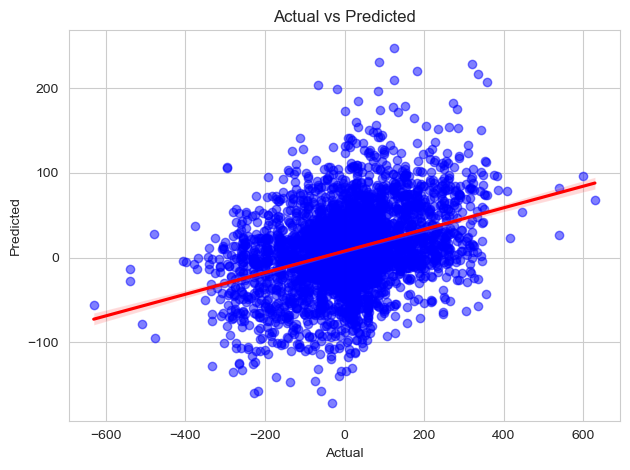

In [128]:
sns.set_style("whitegrid")
sns.regplot(x=y_testap, y=y_test_predap, scatter_kws={'color': 'blue', 'alpha': 0.5}, line_kws={'color': 'red'})
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.tight_layout()
plt.show()

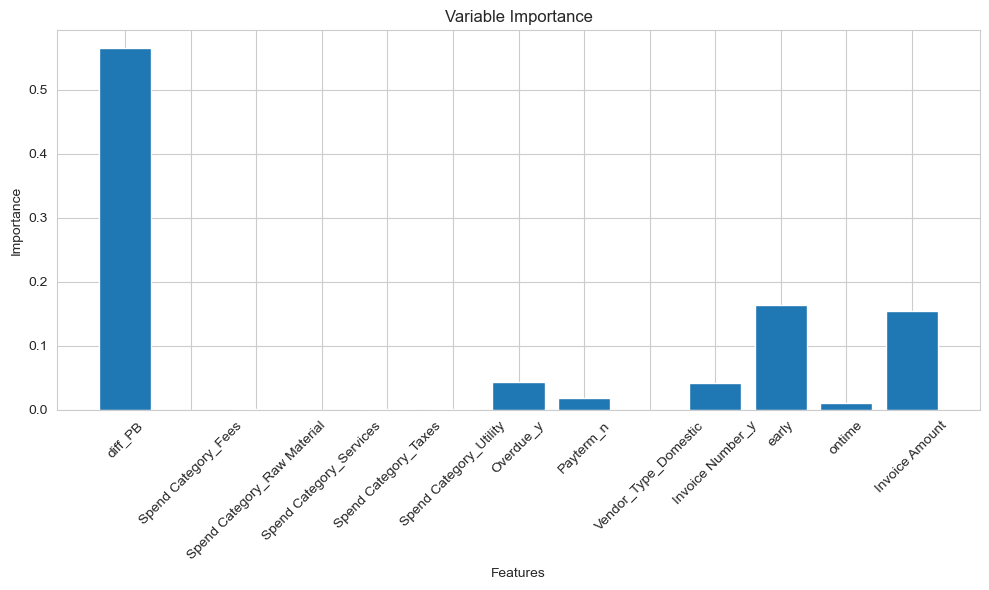

In [129]:
# Create a variable importance graph to visualize feature importance
plt.figure(figsize=(10, 6))  # Set the figure size

# Create a bar chart for feature importances
plt.bar(X_train_ap.columns, importances_ap)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Variable Importance')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust the spacing of the plot elements
plt.show()

In [130]:
# Convert NumPy arrays to DataFrames for train and test predictions
train_predictions_ap = pd.DataFrame(y_train_predap)
test_predictions_ap = pd.DataFrame(y_test_predap)

# Display the DataFrames with train and test predictions
print(train_predictions_ap)
print(test_predictions_ap)

          0
0     56.93
1     36.25
2     45.73
3     25.84
4    101.85
...     ...
9786  12.53
9787 -35.11
9788  -4.52
9789  23.78
9790 -69.71

[9791 rows x 1 columns]
          0
0     26.26
1    -28.64
2     35.94
3     -9.64
4     25.73
...     ...
4192 -14.89
4193  -1.73
4194  12.68
4195  85.50
4196  38.32

[4197 rows x 1 columns]


In [131]:
# Reset the index of the 'X_train_ap' DataFrame
X_train_reset = X_train_ap.reset_index()

# Display the DataFrame with the reset index
print(X_train_reset)

      index  diff_PB  Spend Category_Fees  Spend Category_Raw Material  \
0      7798       92                    0                            1   
1     11830        2                    0                            1   
2     12947        3                    0                            1   
3      5500        2                    0                            1   
4      5888      153                    0                            1   
...     ...      ...                  ...                          ...   
9786   5191        0                    0                            1   
9787  13418       90                    0                            1   
9788   5390        0                    0                            0   
9789    860        4                    0                            1   
9790   7270      -84                    0                            1   

      Spend Category_Services  Spend Category_Taxes  Spend Category_Utility  \
0                           0   

In [132]:
# Merge DataFrames using 'pd.concat' along axis=1 (columns)
df_merged_ap_2 = pd.concat([X_train_reset, train_predictions_ap], axis=1)

In [133]:
# Reset the index of the DataFrame
X_test_reset_ap = X_test_ap.reset_index()

# Display the DataFrame with reset index
print(X_test_reset_ap)

      index  diff_PB  Spend Category_Fees  Spend Category_Raw Material  \
0      9568      151                    0                            1   
1     11364        0                    0                            1   
2     11565        3                    0                            1   
3      3798        1                    0                            1   
4     12414        5                    0                            1   
...     ...      ...                  ...                          ...   
4192   3265        0                    0                            1   
4193  11796        4                    0                            1   
4194  11156        0                    0                            1   
4195   7624       30                    0                            1   
4196   9006        1                    0                            1   

      Spend Category_Services  Spend Category_Taxes  Spend Category_Utility  \
0                           0   

In [134]:
# Merge DataFrames using 'pd.concat' along axis=1 (columns)
df_merged_test_ap = pd.concat([X_test_reset_ap, test_predictions_ap], axis=1)

In [135]:
# Concatenate DataFrames along axis=0 (rows) to combine training and testing data
df_merge_trainTest_ap = pd.concat([df_merged_ap_2, df_merged_test_ap], axis=0)

In [136]:
# Rename the column with predictions to 'Predicted_value'
df_merge_trainTest_ap = df_merge_trainTest_ap.rename(columns={0: 'Predicted_value'})

In [137]:
data_master_ap = data_master_ap.reset_index()

In [138]:
data_master_ap

,index,Invoice Number_x,Posting Date,Invoice Date,Payment Date,Net Due Date (System Calculated Date),Supplier ID,Invoice Amount,Fiscal year,Overdue_x,...,Late payment fees_y,Overdue_y,Spend Category_Fees,Spend Category_Raw Material,Spend Category_Services,Spend Category_Taxes,Spend Category_Utility,Vendor_Type_Domestic,Vendor_Type_International,diff_PB
0,0,INV-5978675602067198,2019-04-12 00:00:00,2019-04-12,2019-12-30,2020-04-01 00:00:00,S-198,7147.00,2019-2020,0.00,...,47.59,5.59,0,0,0,1,0,1,0,0
1,1,INV-4586812911382721,26-12-2019,2019-12-24,2020-01-01,26-02-2020,S-300,6790.00,2019-2020,0.00,...,69.07,11.52,0,1,0,0,0,1,0,2
2,2,INV-9623721287362728,2019-08-12 00:00:00,2019-04-12,2020-01-20,2020-08-03 00:00:00,S-310,12635.00,2019-2020,0.00,...,64.31,8.53,0,1,0,0,0,1,0,122
3,3,INV-6391763768436907,2019-11-03 00:00:00,2019-11-03,2019-03-24,2019-11-04 00:00:00,S-191,6808.00,2019-2020,0.00,...,84.73,14.50,0,0,1,0,0,1,0,0
4,4,INV-576255376736098,18-07-2019,2019-07-15,2019-10-24,18-08-2019,S-222,5834.00,2019-2020,67.00,...,126.78,22.74,0,1,0,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13983,13983,INV-2094234150697486,2019-05-02 00:00:00,2019-04-02,2019-03-14,2019-05-03 00:00:00,S-434,11870.00,2019-2020,9.00,...,90.56,13.28,0,1,0,0,0,1,0,30
13984,13984,INV-9971508041177690,2019-03-04 00:00:00,2019-03-29,2019-03-05,2019-03-07 00:00:00,S-154,5444.00,2019-2020,0.00,...,40.92,7.15,0,1,0,0,0,1,0,-25
13985,13985,INV-923263686839893,2019-03-06 00:00:00,2019-03-06,2019-08-20,2019-03-09 00:00:00,S-449,13346.00,2019-2020,0.00,...,12.24,2.40,0,1,0,0,0,1,0,0
13986,13986,INV-5306060259604092,2019-01-05 00:00:00,2019-01-05,2019-06-27,2019-01-08 00:00:00,S-158,13400.00,2019-2020,0.00,...,31.48,6.16,0,1,0,0,0,1,0,0


In [139]:
# Join a single column ('Predicted_value') from 'merged_df_all_ap' to 'Masterdata_ap' based on the common identifier 'index'
data_Final_ap = pd.merge(data_master_ap, df_merge_trainTest_ap[['index', 'Predicted_value']], on='index')

# Display the merged DataFrame
print(data_Final_ap)

       index      Invoice Number_x         Posting Date Invoice Date  \
0          0  INV-5978675602067198  2019-04-12 00:00:00   2019-04-12   
1          1  INV-4586812911382721           26-12-2019   2019-12-24   
2          2  INV-9623721287362728  2019-08-12 00:00:00   2019-04-12   
3          3  INV-6391763768436907  2019-11-03 00:00:00   2019-11-03   
4          4   INV-576255376736098           18-07-2019   2019-07-15   
...      ...                   ...                  ...          ...   
13983  13983  INV-2094234150697486  2019-05-02 00:00:00   2019-04-02   
13984  13984  INV-9971508041177690  2019-03-04 00:00:00   2019-03-29   
13985  13985   INV-923263686839893  2019-03-06 00:00:00   2019-03-06   
13986  13986  INV-5306060259604092  2019-01-05 00:00:00   2019-01-05   
13987  13987  INV-3588784185880170  2019-01-03 00:00:00   2019-02-25   

      Payment Date Net Due Date (System Calculated Date) Supplier ID  \
0       2019-12-30                   2020-04-01 00:00:00       

In [140]:
# Convert the float column 'Predicted_value' to a timedelta with days as the unit
data_Final_ap['Predict_Timedelta'] = pd.to_timedelta(data_Final_ap['Predicted_value'], unit='days')

In [141]:
# Calculate the 'Predicted_Date' by adding 'Due_Date' and 'Predict_Timedelta'
data_Final_ap['Predicted_Date'] = data_Final_ap['Due_Date'] + data_Final_ap['Predict_Timedelta']

In [142]:
# Convert the 'Predicted_Date' column from datetime to date
data_Final_ap['Predicted_Date'] = pd.to_datetime(data_Final_ap['Predicted_Date']).dt.date

In [143]:
# Convert the 'Predicted_Date' column from object to date
data_Final_ap['Predicted_Date'] = pd.to_datetime(data_Final_ap['Predicted_Date'])

In [144]:
# Extract the week number from 'Predicted_Date' and 'Payment Date' columns
data_Final_ap['Predicted_Week'] = data_Final_ap['Predicted_Date'].dt.isocalendar().week
data_Final_ap['ActualPaid_week'] = data_Final_ap['Payment Date'].dt.isocalendar().week

# Print the DataFrame with the week numbers
print(data_Final_ap)

       index      Invoice Number_x         Posting Date Invoice Date  \
0          0  INV-5978675602067198  2019-04-12 00:00:00   2019-04-12   
1          1  INV-4586812911382721           26-12-2019   2019-12-24   
2          2  INV-9623721287362728  2019-08-12 00:00:00   2019-04-12   
3          3  INV-6391763768436907  2019-11-03 00:00:00   2019-11-03   
4          4   INV-576255376736098           18-07-2019   2019-07-15   
...      ...                   ...                  ...          ...   
13983  13983  INV-2094234150697486  2019-05-02 00:00:00   2019-04-02   
13984  13984  INV-9971508041177690  2019-03-04 00:00:00   2019-03-29   
13985  13985   INV-923263686839893  2019-03-06 00:00:00   2019-03-06   
13986  13986  INV-5306060259604092  2019-01-05 00:00:00   2019-01-05   
13987  13987  INV-3588784185880170  2019-01-03 00:00:00   2019-02-25   

      Payment Date Net Due Date (System Calculated Date) Supplier ID  \
0       2019-12-30                   2020-04-01 00:00:00       

In [145]:
data_Final_ap

,index,Invoice Number_x,Posting Date,Invoice Date,Payment Date,Net Due Date (System Calculated Date),Supplier ID,Invoice Amount,Fiscal year,Overdue_x,...,Spend Category_Taxes,Spend Category_Utility,Vendor_Type_Domestic,Vendor_Type_International,diff_PB,Predicted_value,Predict_Timedelta,Predicted_Date,Predicted_Week,ActualPaid_week
0,0,INV-5978675602067198,2019-04-12 00:00:00,2019-04-12,2019-12-30,2020-04-01 00:00:00,S-198,7147.00,2019-2020,0.00,...,1,0,1,0,0,19.97,19 days 23:22:01.339026965,2020-04-20,17,1
1,1,INV-4586812911382721,26-12-2019,2019-12-24,2020-01-01,26-02-2020,S-300,6790.00,2019-2020,0.00,...,0,0,1,0,2,10.03,10 days 00:39:07.959011094,2020-03-07,10,1
2,2,INV-9623721287362728,2019-08-12 00:00:00,2019-04-12,2020-01-20,2020-08-03 00:00:00,S-310,12635.00,2019-2020,0.00,...,0,0,1,0,122,76.56,76 days 13:29:01.595062147,2020-10-18,42,4
3,3,INV-6391763768436907,2019-11-03 00:00:00,2019-11-03,2019-03-24,2019-11-04 00:00:00,S-191,6808.00,2019-2020,0.00,...,0,0,1,0,0,5.88,5 days 21:04:25.351630907,2019-11-09,45,12
4,4,INV-576255376736098,18-07-2019,2019-07-15,2019-10-24,18-08-2019,S-222,5834.00,2019-2020,67.00,...,0,0,1,0,3,-2.35,-3 days +15:36:13.137178070,2019-08-15,33,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13983,13983,INV-2094234150697486,2019-05-02 00:00:00,2019-04-02,2019-03-14,2019-05-03 00:00:00,S-434,11870.00,2019-2020,9.00,...,0,0,1,0,30,64.55,64 days 13:09:12.335973108,2019-07-06,27,11
13984,13984,INV-9971508041177690,2019-03-04 00:00:00,2019-03-29,2019-03-05,2019-03-07 00:00:00,S-154,5444.00,2019-2020,0.00,...,0,0,1,0,-25,-5.43,-6 days +13:46:19.301872458,2019-03-01,9,10
13985,13985,INV-923263686839893,2019-03-06 00:00:00,2019-03-06,2019-08-20,2019-03-09 00:00:00,S-449,13346.00,2019-2020,0.00,...,0,0,1,0,0,-19.99,-20 days +00:07:40.990791355,2019-02-17,7,34
13986,13986,INV-5306060259604092,2019-01-05 00:00:00,2019-01-05,2019-06-27,2019-01-08 00:00:00,S-158,13400.00,2019-2020,0.00,...,0,0,1,0,0,31.89,31 days 21:20:44.810644807,2019-02-08,6,26


## Working Capital Optimization Calc.

In [146]:
# Select specific columns using the 'loc' accessor for AR and AP data
AR_week = df_with_predicted.loc[:, ['Predicted_Week', 'Total Open Amount_USD']]
AP_week = data_Final_ap.loc[:, ['Predicted_Week', 'Invoice Amount']]

In [147]:
AR_week

,Predicted_Week,Total Open Amount_USD
0,7,54273.28
1,33,79656.60
2,39,2253.86
3,48,33133.29
4,32,16447.12
...,...,...
39995,30,84780.40
39996,35,6766.54
39997,10,6120.86
39998,50,63.48


In [148]:
AP_week

,Predicted_Week,Invoice Amount
0,17,7147.00
1,10,6790.00
2,42,12635.00
3,45,6808.00
4,33,5834.00
...,...,...
13983,27,11870.00
13984,9,5444.00
13985,7,13346.00
13986,6,13400.00


In [149]:
# Group and aggregate the 'Week_AP' DataFrame by 'Predicted_Week' to calculate the total invoice amount for each week
AP_week_agg = AP_week.groupby(['Predicted_Week']).agg({'Invoice Amount': 'sum'}).reset_index()

In [150]:
# Group and aggregate the 'Week_AR' DataFrame by 'Predicted_Week' to calculate the total open amount for each week in accounts receivable
AR_week_agg= AR_week.groupby(['Predicted_Week']).agg({'Total Open Amount_USD': 'sum'}).reset_index()

In [151]:
AP_week_agg = AP_week_agg.rename(columns={('Invoice Amount'):'Amount_AP'})

In [152]:
AR_week_agg = AR_week_agg.rename(columns={('Total Open Amount_USD'):'Amount_AR'})

In [153]:
# Merge DataFrames 'ARBYWEEK' and 'APBYWEEK' using the common column 'Predicted_Week'
WCO_by_week = pd.merge(AR_week_agg, AP_week_agg, on='Predicted_Week')

In [154]:
WCO_by_week

,Predicted_Week,Amount_AR,Amount_AP
0,1,8684821.39,4220387.00
1,2,7261912.91,3787765.00
2,3,26245456.89,3928530.00
3,4,33805731.05,3240941.00
4,5,36026856.18,3640452.00
5,6,38370467.91,3466854.00
6,7,38115928.61,3753407.00
7,8,38017667.84,3630888.00
8,9,36026485.32,3471059.00
9,10,36515906.95,3023206.00


In [155]:
# Calculate the working capital by subtracting 'Amount_AP' from 'Amount_AR' for each week
WCO_by_week['Working_Capital'] = WCO_by_week['Amount_AR'] - WCO_by_week['Amount_AP']

In [156]:
WCO_by_week

,Predicted_Week,Amount_AR,Amount_AP,Working_Capital
0,1,8684821.39,4220387.00,4464434.39
1,2,7261912.91,3787765.00,3474147.91
2,3,26245456.89,3928530.00,22316926.89
3,4,33805731.05,3240941.00,30564790.05
4,5,36026856.18,3640452.00,32386404.18
5,6,38370467.91,3466854.00,34903613.91
6,7,38115928.61,3753407.00,34362521.61
7,8,38017667.84,3630888.00,34386779.84
8,9,36026485.32,3471059.00,32555426.32
9,10,36515906.95,3023206.00,33492700.95
